In [30]:
import pandas as pd

In [31]:
#Para leer el CSV
data_ads = pd.read_csv("/content/Advertising.csv")
#()  {}

In [32]:
data_ads.head()
#Data set que evidecia los gastos que se tiene en TV , Radio , Newspaper y como eso repercute en las ventas

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
len(data_ads)

200

In [34]:
#Biblioteca de python para trabajar con vectores y matrices
import numpy as np

In [35]:
#Numerador de coeficiente de correlacion de pearson entre la TV y Sales
#data_ads["corrn"] es el numerador de coeficiente de correlacion de pearson
data_ads["corrn"] = (data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [36]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [37]:
#Sumatoria 1
x1 = (data_ads["TV"]-np.mean(data_ads["TV"]))**2

#Sumatoria 2

x2 = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2


#Calculo del coeficiente de correlacion de pearson

Cp = sum(data_ads["corrn"])/ np.sqrt(sum(x1)*sum(x2))

In [38]:
print('El coeficiente de correlacion de pearson es {}'.format(Cp))

El coeficiente de correlacion de pearson es 0.782224424861606


In [39]:
#Ahora esto vamos a convertirlo en una funcion donde solo vamos a ingresar el dataframe
#y los campos a evaluar la correlacion

In [40]:
def correlacion(data_frame,campo1,campo2):
  data_frame["corrn"] = (data_frame[campo1]-np.mean(data_frame[campo1]))*(data_frame[campo2] - np.mean(data_frame[campo2]))
    #Sumatoria 1
  x1 = (data_frame[campo1]-np.mean(data_frame[campo1]))**2
  #Sumatoria 2
  x2 = (data_ads[campo2]-np.mean(data_ads[campo2]))**2
  #Calculo del coeficiente de correlacion de pearson
  Cp = sum(data_frame["corrn"])/ np.sqrt(sum(x1)*sum(x2))
  return Cp

In [41]:
#()  {}
print('La correlacion de los gastos de tv y las ventas son {}'.format(correlacion(data_ads,"TV","Sales")))

La correlacion de los gastos de tv y las ventas son 0.782224424861606


In [46]:
print(type(correlacion(data_ads,"TV","Sales")))

<class 'numpy.float64'>


In [42]:
#()  {}
print('La correlacion de los gastos de Radio y las ventas son {}'.format(correlacion(data_ads,"Radio","Sales")))

La correlacion de los gastos de Radio y las ventas son 0.576222574571055


In [43]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales', 'corrn'], dtype=object)

In [44]:
#Vamos a eliminar las columnas que se adiciono que ahora data
data_ads = data_ads.drop('corrn',axis=1)
print(data_ads)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [45]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [49]:
#Con esto estamos hallando la correlacion de todas contra todas las variables.
for x in cols:
  for y in cols:
    print(x + " , " + y + " : " + str(correlacion(data_ads,x,y)))

#Según lo que se puede apreciar lo que más aumenta las ventas son la publicidad por TV

TV , TV : 1.0
TV , Radio : 0.05480866446583006
TV , Newspaper : 0.056647874965056993
TV , Sales : 0.782224424861606
Radio , TV : 0.05480866446583006
Radio , Radio : 1.0
Radio , Newspaper : 0.35410375076117545
Radio , Sales : 0.576222574571055
Newspaper , TV : 0.056647874965056993
Newspaper , Radio : 0.35410375076117545
Newspaper , Newspaper : 1.0
Newspaper , Sales : 0.22829902637616534
Sales , TV : 0.782224424861606
Sales , Radio : 0.576222574571055
Sales , Newspaper : 0.22829902637616534
Sales , Sales : 1.0


In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

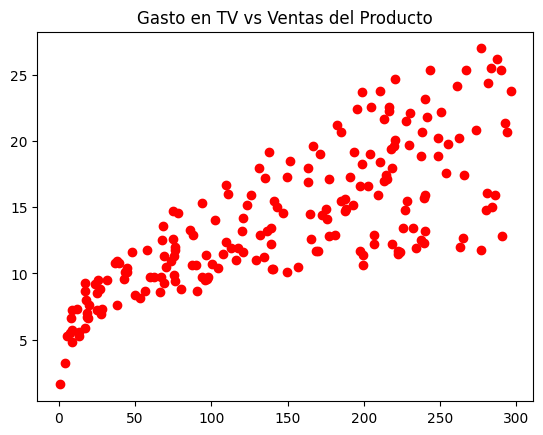

In [51]:
#vamosa ver la tendencia que se tiene entre la tv y las ventas
#()  {}
plt.plot(data_ads["TV"] ,  data_ads["Sales"] , "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

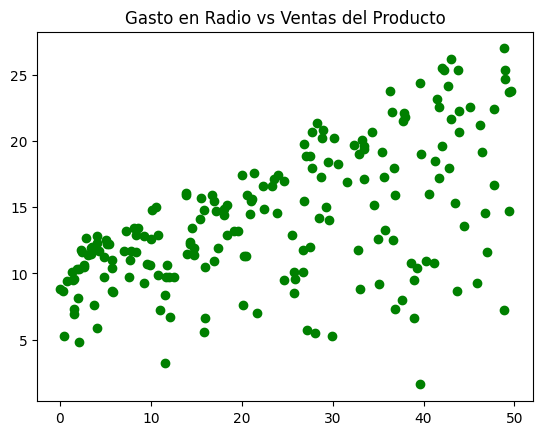

In [54]:
#vamosa ver la tendencia que se tiene entre la Radio y las ventas
#()  {}
plt.plot(data_ads["Radio"] ,  data_ads["Sales"] , "go")
plt.title("Gasto en Radio vs Ventas del Producto")

In [55]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

Text(0.5, 1.0, 'Gasto en Periodico vs Ventas del Producto')

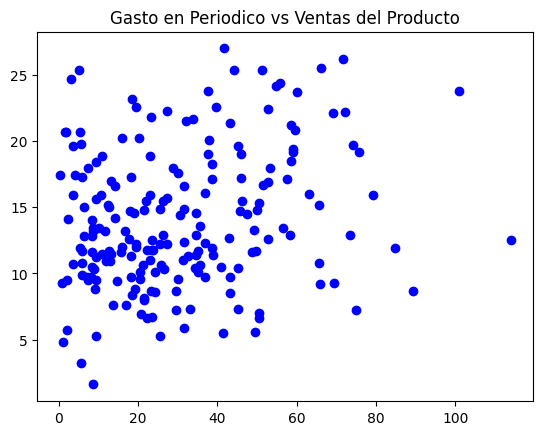

In [57]:
#vamosa ver la tendencia que se tiene entre la Newspaper y las ventas
#()  {}
plt.plot(data_ads["Newspaper"] ,  data_ads["Sales"] , "bo")
plt.title("Gasto en Periodico vs Ventas del Producto")

## Uso de la Funcion .corr() para poder hallar la correlacion en usando pandas

In [59]:
#Ahora en pandas nosotros tenemos una funcion para hallar la matriz de correlacion con un solo comando
#Para leer el CSV
#()  {}
data_ads = pd.read_csv("/content/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


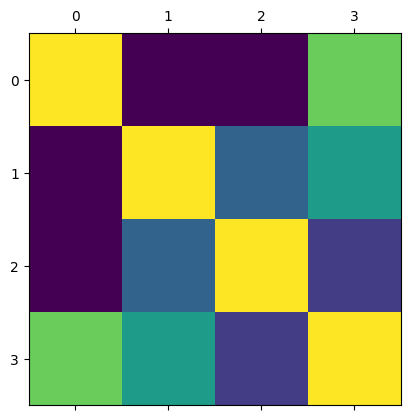

In [60]:
plt.matshow(data_ads.corr())